### Executive Summary
We define 6 question about cartier dataset, this data scraped from www.cartier.com, It's include informations about category of products and price of them, tags are covering metal and gems that used in **Jewelery**. 
1. Which gem are used in the products?
2. Which metal mostly used in Cartier Jewellery?
3. How much is the mean of Cartier jewellery as metal type?
4. How much the mean price for every metal type in cartier jewels?
5. How many gems in every jewels category?
6. How much the gem price in every jewels category?
7. Which gem is the most expensive?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cartier = pd.read_csv('dataset/cartier_catalog.csv')

In [3]:
cartier.head(5)

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [4]:
# Define tag_splitter // splits column  
def tag_spiliter(dataframe , col_name , delimiter , metal , first_gem , second_gem , third_gem , foruth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe.str_split.str.get(0).str.strip()
    dataframe[first_gem] = dataframe.str_split.str.get(1).str.strip()
    dataframe[second_gem] = dataframe.str_split.str.get(2).str.strip()
    dataframe[third_gem] = dataframe.str_split.str.get(3).str.strip()
    dataframe[foruth_gem] = dataframe.str_split.str.get(4).str.strip()
    dataframe.fillna(0 , inplace=True)
    del dataframe['str_split']

In [5]:
# Recall tag_splitter
tag_spiliter(cartier , 'tags' , ',' , 'metal' , 'gem' , 'second_gem' , 'third_gem' , 'foruth_gem')

## 1. Which gem are mostly used in the products?

In [6]:
# Drop redundant columns
cartier.drop(['ref' , 'image' , 'tags' , 'title' , 'description'] , axis  = 1 , inplace=True)
gems = pd.concat([cartier["gem"],cartier["second_gem"],cartier["third_gem"],cartier["foruth_gem"]], axis= 0)
gems_values = gems.value_counts()[1:].to_frame()
gems_values.reset_index(inplace=True)
gems_values.columns = ['gem_type' , 'count']

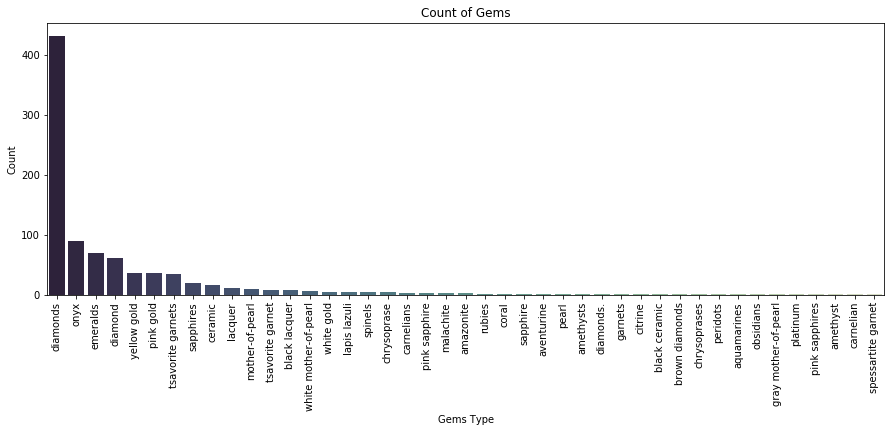

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x= 'gem_type', y= "count", data= gems_values,
            palette= sns.cubehelix_palette(len(gems_values.gem_type), start=.5, rot=-.75, reverse= True))
plt.xlabel("Gems Type")
plt.ylabel("Count")
plt.title("Count of Gems")
plt.xticks(rotation= 90)
plt.show()

A glance at the above figure reveals to us that diamonds in all products are the most used gem, about **66 percent** of the product have diamonds in them, more than any other gems, Its most popular gem. onyx and emeralds are into the next ranks. 

In [8]:
# Dictionary for costum color palette 
color_dict = {'yellow gold': "#fcc72d", 
              'platinum': "#e5e4e2", 
              'pink gold': "#e9cdd0", 
              'white gold': "#f9f3d1", 
              'non-rhodiumized white gold': "#C0C0C0"}

## 2. Which metal mostly used in Cartier Jewellery?

In [9]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()
cartier_category_metal.columns = ['count']
cartier_category_metal.reset_index(level = [0 , 1] , inplace=True)

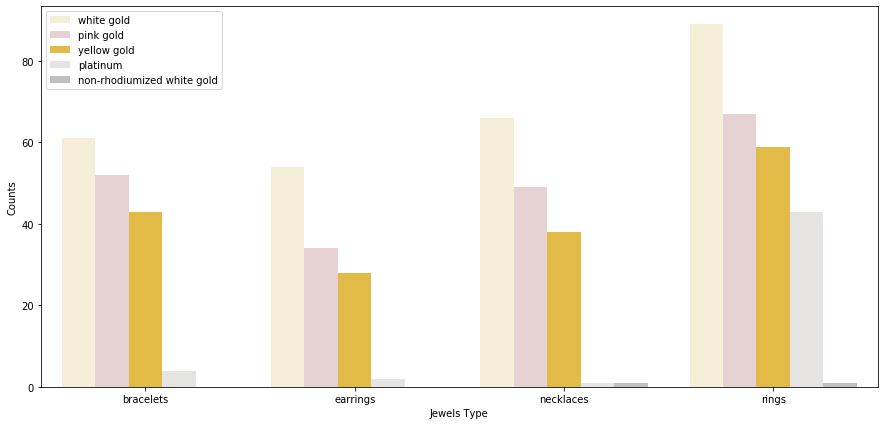

In [10]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "categorie", y= "count", hue= "metal", data= cartier_category_metal, 
            palette= color_dict)
plt.xlabel("Jewels Type")
plt.ylabel("Counts")
plt.legend(loc= "upper left")
plt.show()

Jewels type include 4 category: **rings, earring, necklaces and bracelets** \
Ranks of metals in every category are the same and equal: 1.White Gold 2.Pink Gold 3.Yellow Gold 4.Platinum 5.Non-Rhodiumized White Gold

## 3. How much is the mean of Cartier jewellery as metal type?

In [11]:
cartier_gp1 = cartier.groupby(["categorie", "metal"])["price"].mean().round(2).to_frame()
cartier_gp1 = cartier_gp1.reset_index()

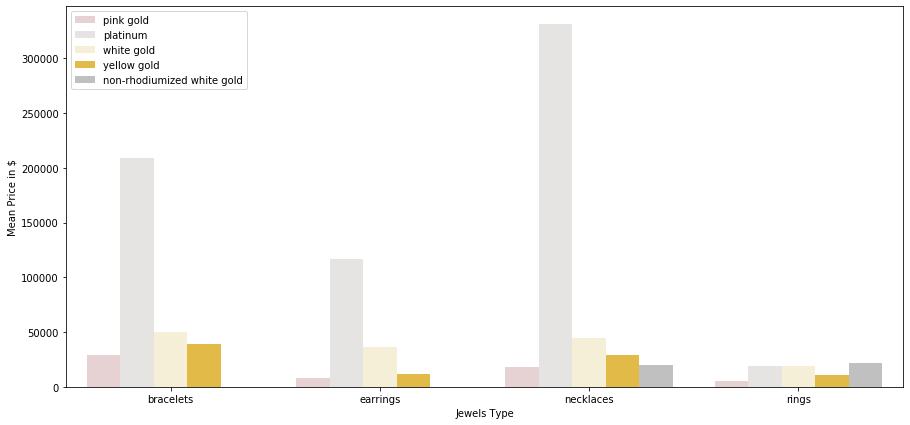

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'metal', data= cartier_gp1 , palette = color_dict)
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(loc= "upper left")
plt.show()

In every category **Platinum** in most valuable metal with a huge difference in price as $. After that White Gold have a second place but other metals are close in price for every category

## 4. How much the mean price for every metal type in cartier jewels?

In [13]:
cartier_gp2 = cartier.groupby("metal")["price"].mean().round(2).to_frame()
cartier_gp2.reset_index(inplace=True)

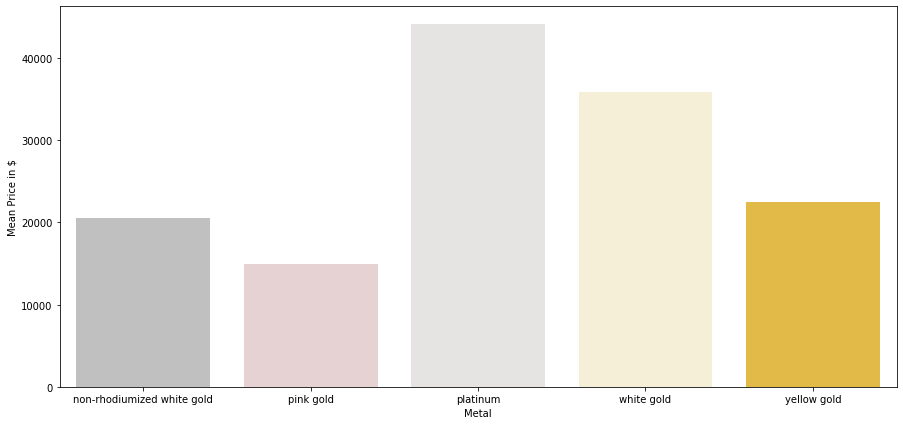

In [14]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "metal" , y = 'price', data=cartier_gp2 , palette = color_dict)
plt.xlabel('Metal')
plt.ylabel('Mean Price in $')
plt.show()

As we saw earlier Platinium is the most valuable metal that the Cartier used in jewels. The mean price of Platinium jewels is more than **40000** Dollars after that white metal is second. "Yellow Gold" and "Non-Rhodiumized White Gold" are about equal in mean price, in last is pink gold with mean of **15000** Dollars that is about one of third of Platinium

## 5. How many gems in every jewels category?

In [15]:
cartier_gp_gem = cartier.groupby('categorie')['gem'].value_counts().to_frame()
cartier_gp_gem.columns = ['count']
cartier_gp_gem.reset_index(level = [0 , 1] , inplace=True)
cartier_gp_gem = cartier_gp_gem[cartier_gp_gem["gem"] != 0]

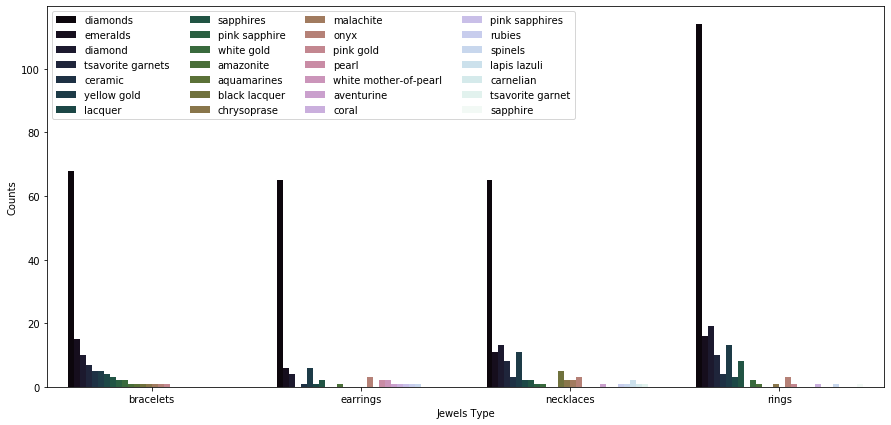

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'count', hue= 'gem', data= cartier_gp_gem , palette = sns.color_palette("cubehelix", 28))
plt.xlabel('Jewels Type')
plt.ylabel('Counts')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

In all categories, **diamond** is the most popular gem in the making of jewelry.  Exceedingly over 100 ring types include **diamonds**, in most cases more than one piece of **diamond**. This also rules for other categories of jewelry such as **earrings**, **necklaces**, and **bracelets**. Variety of the gems used in **rings** and **bracelets** are more than **earrings** and **necklaces**. Furthermore, **Sapphires** are also a popular gem used in **ring** production.

## 6. How much the gem price in every jewels category?

In [20]:
cartier_gp1_gem = cartier.groupby(["categorie", "gem"])["price"].mean().round(2).to_frame()
cartier_gp1_gem = cartier_gp1_gem.reset_index()
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["gem"] != 0]

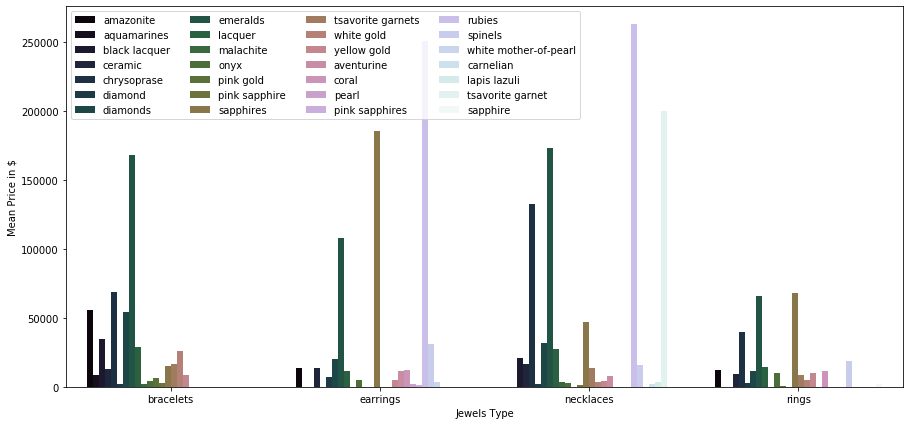

In [21]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'gem', data= cartier_gp1_gem , palette = sns.color_palette("cubehelix", 28))
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

Earrings, Necklaces, and Rings with Rubies(gem) has a huge difference in the price of jewelry, but Emeralds(gem) in Bracelets shows the is a key factor in price determination. A closer look at necklaces reveals us that Tsavorite garnet has third place in price.

## 7. Which gem is the most expensive?

In [19]:
cartier_gp2_gem = cartier.groupby("gem")["price"].mean().round(2).to_frame()
cartier_gp2_gem.reset_index(inplace=True)
cartier_gp2_gem = cartier_gp2_gem[(cartier_gp2_gem['gem'] != 'white gold') &
                                  (cartier_gp2_gem['gem'] != 'yellow gold') & 
                                  (cartier_gp2_gem['gem'] != 0)]

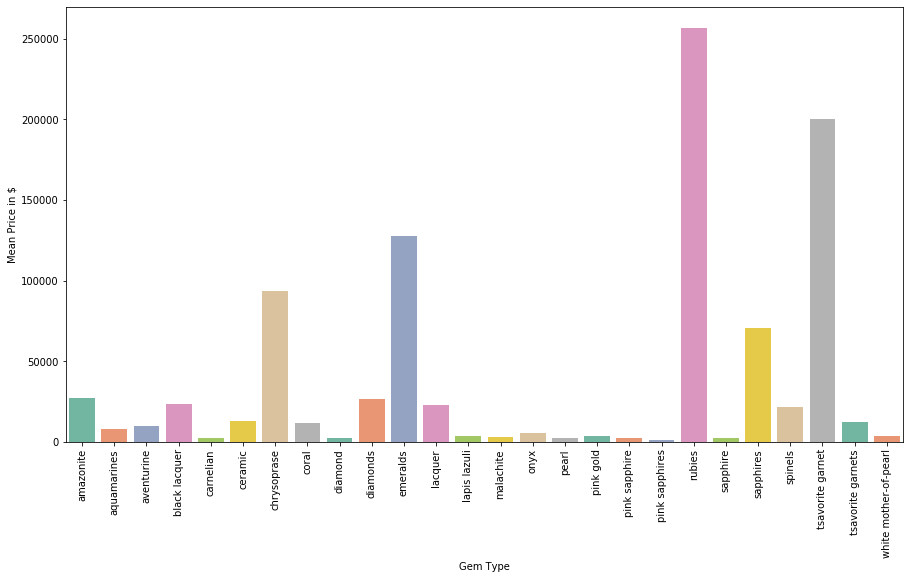

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(x= 'gem' , y = 'price', data=cartier_gp2_gem ,  palette = sns.color_palette("Set2"))
plt.xlabel('Gem Type')
plt.ylabel('Mean Price in $')
plt.xticks(rotation=90)
plt.show()

This plot shows us the mean price of products with gems on them
As we could have predicted products that have Rubies on them are the most expensive jewelry in Cartier products. the next ranks belong to Tsavorite garnets, Emeralds, and the Chrysoprase. The middle gems on the above figure are equal in mean price 